
# 📘 Chapter 9: Support Vector Machines (SVM)

This chapter presents **Support Vector Machines (SVM)** for classification. It develops the geometric intuition, the hard‑ and soft‑margin formulations, the hinge loss, and the **kernel trick**. Practical usage is shown with scikit‑learn, including **Linear SVM** and **RBF kernel SVM**, with cross‑validated hyperparameters. The exposition is in **third‑person** textbook style with clean LaTeX.


## 9.1 Intuition: Maximum‑Margin Classification

An SVM seeks a separating hyperplane with the **largest margin** between classes. For a linear model,
$$
f(x) \;=\; w^\top x + b, \qquad \hat{y}(x) = \mathrm{sign}\!\big(f(x)\big).
$$

The **geometric margin** between the two closest points (support vectors) is
$$
\text{margin} \;=\; \frac{2}{\lVert w \rVert_2}.
$$
Maximizing the margin improves robustness to small perturbations.


## 9.2 Hard‑Margin and Soft‑Margin SVM

### Hard‑margin SVM (linearly separable)

The hard‑margin optimization problem is
$$
\begin{aligned}
\min_{w,b}\quad & \tfrac{1}{2}\,\lVert w \rVert_2^2 \\[2pt]
\text{s.t.}\quad & y^{(i)}\big(w^\top x^{(i)} + b\big) \;\ge\; 1,\quad i=1,\dots,n.
\end{aligned}
$$
This enforces that all points lie **outside** the margin (perfect separation).


Most real datasets are **not** perfectly separable. Soft‑margin SVM introduces non‑negative **slack variables** \(\xi_i\) to allow violations:
$$
\begin{aligned}
\min_{w,b,\xi}\quad & \tfrac{1}{2}\lVert w \rVert_2^2 + C \sum_{i=1}^{n} \xi_i \\[2pt]
\text{s.t.}\quad & y^{(i)}\big(w^\top x^{(i)} + b\big) \;\ge\; 1 - \xi_i,\quad \xi_i \ge 0.
\end{aligned}
$$

An equivalent unconstrained objective uses the **hinge loss**:
$$
\mathcal{L}(w,b) \;=\; \frac{1}{n}\sum_{i=1}^{n} \max\!\big(0,\, 1 - y^{(i)} f(x^{(i)})\big) \;+\; \frac{\lambda}{2}\lVert w \rVert_2^2, \quad \lambda \propto \tfrac{1}{C}.
$$

The hyperparameter \(C > 0\) trades off **margin width** (regularization) against **violation penalties**.



## 9.3 Kernels and Feature Maps

When the classes are not linearly separable in the input space, SVMs lift inputs via a feature map \(\phi(x)\) and use the **kernel trick**:
$$
k(x, x') \;=\; \langle \phi(x), \phi(x') \rangle.
$$

Common kernels:
- **Linear:** $(k(x,x') = x^\top x'$)
- **Polynomial:** $(k(x,x') = \big(\gamma\,x^\top x' + r\big)^d$)
- **RBF (Gaussian):** $(k(x,x') = \exp\!\big(-\gamma \lVert x - x' \rVert_2^2\big)$
- **Sigmoid:** $(k(x,x') = \tanh(\gamma\,x^\top x' + r)$)   
- **Sine:** $(k(x,x') = \sin(\gamma\,x^\top x' + r)$)   

Hyperparameters:
- $(C$): misclassification penalty (smaller &(C&) → wider margin, more bias)
- $(\gamma$) (for RBF/poly): kernel width/scale (larger $(\gamma$) → narrower influence)
- $(d$), $(r$) (polynomial): degree and offset


## 9.4 Multiclass Strategies

SVMs are inherently binary. Multiclass extensions include:
- **One‑vs‑Rest (OvR):** train \(K\) binary classifiers (class \(k\) vs. all).
- **One‑vs‑One (OvO):** train a classifier for each class pair (majority vote).

Scikit‑learn implements these strategies automatically for `SVC`.


## 9.5 Practical Notes

- **Scale features** (e.g., standardization) before SVMs.  
- Use **cross‑validation** to choose \(C\) (and \(\gamma\) for RBF).  
- For **class imbalance**, consider `class_weight="balanced"` or resampling.  
- In scikit‑learn, `LinearSVC` uses a linear kernel with an efficient solver; `SVC(kernel="linear")` is also available.



## 9.6 Hands‑On A: Linear SVM on Iris (with Standardization)

A linear SVM is trained using a pipeline. Only \(C\) is tuned. The grid search uses a single process (`n_jobs=1`) for reliability on Windows/conda setups.


In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scale -> linear SVM
pipe_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Grid only on C
param_grid_lin = {'svm__C': np.logspace(-3, 2, 8)}

# Single-process grid search (avoids TerminatedWorkerError on some Windows setups)
grid_lin = GridSearchCV(pipe_lin, param_grid_lin, cv=5, n_jobs=1, verbose=1, error_score='raise')
grid_lin.fit(X_train, y_train)

print("Best params (Linear SVM):", grid_lin.best_params_)
print("Best CV accuracy (Linear SVM): %.4f" % grid_lin.best_score_)

# Evaluate on test set
best_lin = grid_lin.best_estimator_
y_pred_lin = best_lin.predict(X_test)

print("Test accuracy (Linear SVM): %.4f" % accuracy_score(y_test, y_pred_lin))
print("\nClassification report (Linear SVM):\n", classification_report(y_test, y_pred_lin, target_names=iris.target_names))
print("\nConfusion matrix (Linear SVM):\n", confusion_matrix(y_test, y_pred_lin))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params (Linear SVM): {'svm__C': np.float64(0.13894954943731375)}
Best CV accuracy (Linear SVM): 0.9750
Test accuracy (Linear SVM): 0.9667

Classification report (Linear SVM):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion matrix (Linear SVM):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]



## 9.7 Hands‑On B: RBF‑Kernel SVM and Decision Regions (2D Subset)

Two informative features (`petal length`, `petal width`) are used for visualization. Both \(C\) and \(\gamma\) are tuned; the decision regions are then plotted.


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best params (RBF SVM): {'svm__C': np.float64(7.196856730011521), 'svm__gamma': np.float64(0.003727593720314938)}
Best CV accuracy (RBF SVM): 0.9750
Test accuracy (RBF SVM 2D): 0.9667


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


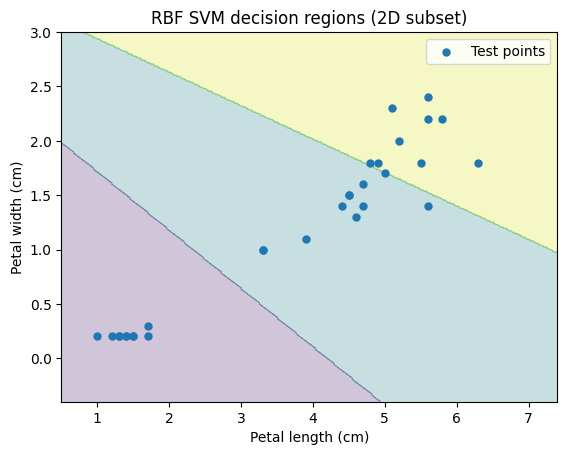

In [2]:

# If needed, install deps:
# !pip install numpy pandas scikit-learn matplotlib

import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 2D subset for visualization
X2 = X[['petal length (cm)', 'petal width (cm)']]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

param_grid_rbf = {
    'svm__C':     np.logspace(-2, 3, 8),   # 1e-2 ... 1e3
    'svm__gamma': np.logspace(-3, 1, 8)    # 1e-3 ... 1e1
}

grid_rbf = GridSearchCV(pipe_rbf, param_grid_rbf, cv=5, n_jobs=1, verbose=1, error_score='raise')
grid_rbf.fit(X2_train, y2_train)

print("Best params (RBF SVM):", grid_rbf.best_params_)
print("Best CV accuracy (RBF SVM): %.4f" % grid_rbf.best_score_)

best_rbf = grid_rbf.best_estimator_
y2_pred = best_rbf.predict(X2_test)
print("Test accuracy (RBF SVM 2D): %.4f" % accuracy_score(y2_test, y2_pred))

# Decision regions (separate figure; default styles)
x_min, x_max = X2.iloc[:, 0].min() - 0.5, X2.iloc[:, 0].max() + 0.5
y_min, y_max = X2.iloc[:, 1].min() - 0.5, X2.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_rbf.predict(grid_points).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X2_test.iloc[:, 0], X2_test.iloc[:, 1], s=25, label="Test points")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("RBF SVM decision regions (2D subset)")
plt.legend()
plt.show()



## 9.8 Linear vs. RBF: Brief Comparison

- **Linear SVM** performs well when classes are (approximately) linearly separable in the scaled feature space.  
- **RBF SVM** can capture non‑linear boundaries by implicitly mapping to a higher‑dimensional space.  
- Cross‑validation over $(C$) and $(\gamma$) is essential for RBF kernels.


## 9.9 Summary

- SVMs implement maximum‑margin classification with hinge loss and regularization.  
- Soft margins handle non‑separable data; the \(C\) parameter trades off margin width and violations.  
- Kernels enable non‑linear decision boundaries; RBF is a robust default choice.  
- Proper scaling and cross‑validated hyperparameters are critical in practice.
- SVMs are fast and scalable, but are not always optimal.  
- SVMs are not always interpretable, but can be used for feature selection.
